<a href="https://colab.research.google.com/github/adarshraut493/email-spam/blob/main/Copy_of_Workbook_Email_Spam_Detection_system_using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Explanation

## Explanation
The problem at hand involves classifying messages as either "spam" or "ham" (non-spam). This is a classic example of a binary classification task, where we aim to train a machine learning model that can automatically sort incoming messages based on their content. The significance of solving this problem lies in various applications, such as email filtering systems, SMS spam detection, and maintaining the integrity of messaging platforms.

Spam messages are often unsolicited and can contain phishing links, scams, or unwanted advertisements. Being able to filter these out can save users time and protect them from potential threats. On the other hand, ham messages are regular, non-spam messages that are important to the user. It's crucial that the system has a high accuracy in classifying spam to avoid false positives, which could result in important messages being mistakenly labeled as spam.



```
# Pseudocode for a classification decision
if message_contains_spam_keywords(message):
    classify_as_spam()
else:
    classify_as_ham()
```

The pseudocode above represents a very simplified logic that a spam filter might use, where a message is classified as spam if it contains certain keywords. This is not how modern classifiers work, but it gives a beginner an idea of the decision-making process involved in classification. The actual implementation will use a machine learning algorithm to learn from data which messages are spam or ham.

Next, we'll move on to the Dataset Exploration step. Let's load the dataset you've provided and start exploring it to understand its structure.


# 2. Importing Libraries

To work with our dataset and eventually apply the KNN algorithm, we need to import several libraries:

- numpy: Provides support for efficient numerical operations.
- pandas: Essential for data manipulation and analysis.
- matplotlib and seaborn: Used for data visualization.
- sklearn: This is the library that contains a variety of machine learning algorithms, including KNN, as well as utilities for data preprocessing, model evaluation, etc.







In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Dataset Exploration

Link to dataset: https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data

The dataset we are working with is structured as a CSV file with 5171 entries, each representing an email message. It contains the following columns:


In [ ]:
data = pd.read_csv('spam_ham_dataset (1).csv')

In [ ]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0



- **unnamed**: an index or identifier for each message.

- **label**: This is a string indicating whether the message is 'spam' or 'ham'

- **text**: The content of the email message

- **label_num**: A numerical representation of the label column, where '0' corresponds to 'ham' and '1' corresponds to 'spam'


    For our machine learning task, the text column will serve as the feature (input), while label_num will be the target (output) we want our model to predict.

In [ ]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# 4. Data Analysis
Explanation
In this section, we'll take a closer look at our dataset to understand the distribution of classes (spam vs. ham), identify any patterns or anomalies, and prepare the data for the machine learning model. This will involve statistical analysis, visualization, and preprocessing.

We'll start by visualizing the distribution of spam and ham messages in the dataset, and then we'll perform some basic text analysis. Let's begin with the distribution of classes.

label
ham     3672
spam    1499
Name: count, dtype: int64


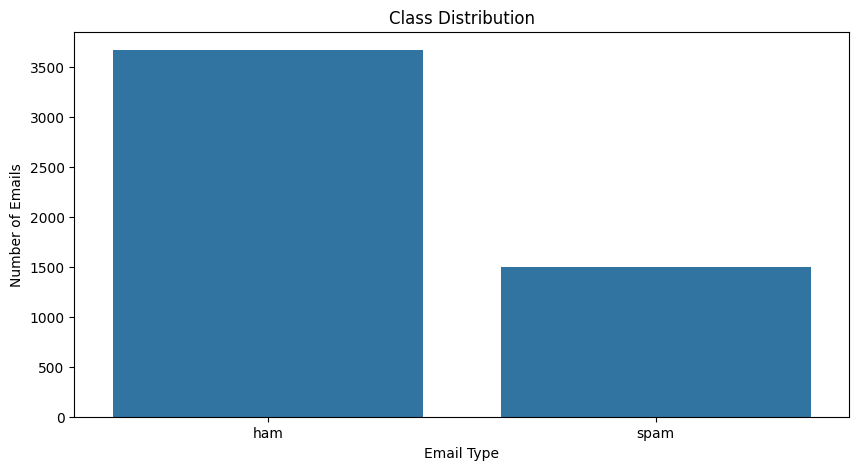

In [ ]:
# Class Balance Analysis
class_counts = data['label'].value_counts() # value_counts find spam and ham count.
print(class_counts)

# Plo# Step 3.1: Draw a bar chart to visualize the class distribution
plt.figure(figsize=(10, 5))                  # make the chart bigger
sns.barplot(x=class_counts.index, y=class_counts.values)  # draw bars for each class (spam and ham)
plt.title('Class Distribution')               # add a title to the chart
plt.ylabel('Number of Emails')                # label the y-axis
plt.xlabel('Email Type')                      # label the x-axis
plt.show()                                    # display the chart

The bar plot above illustrates the distribution of spam and ham messages within our dataset. From this visualization, we can observe whether there's a significant imbalance between the two classes.

Based on the plot, it looks like there are more ham messages than spam messages, which is typical in real-world scenarios where legitimate messages usually outnumber spam. It's important to consider this imbalance when training our machine learning model, as it may lead to a model that's biased towards predicting the majority class. To address this, we might explore techniques such as resampling the dataset, using different evaluation metrics, or adjusting the class weights in the machine learning algorithm.



## Word Frequency Analysis:



In [ ]:
from collections import Counter

In [ ]:
data[data['label']=="ham"]

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
...,...,...,...,...
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [ ]:
def get_most_common_words(class_label,num_words,column_name,dataset):
    text = " ".join(message for message in dataset[dataset['label'] == class_label][column_name])
# text will have "free money click here win free gift click"

# Code Part	What it does	Example Output
# dataset['label'] == 'spam'	Finds spam rows	[False, True, True]
# dataset[dataset['label']]	Keeps only spam rows	spam rows only
# [column_name]	Takes the text column	["free money click here", "win free gift click"]
# " ".join(...)	Combines into one big text	"free money click here win free gift click"
    words = text.split()
    return Counter(words).most_common(num_words)

In [ ]:
get_most_common_words("spam",20,"text",data)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787),
 ('in', 3129),
 ('=', 3091),
 ('you', 2794),
 ('for', 2523),
 ('!', 2458),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ('?', 1928),
 ("'", 1762)]

For ham messages, the most common items are often punctuation marks and common English words, along with some email-specific terms like 'ect' (possibly a truncated version of 'etcetera' or a specific term) and 'enron'.

For spam messages, again punctuation marks and common English words are frequent, but there are also indicators of spam content such as exclamation marks and sales or urgency-related words like 'free', '!', and '?'.

## Text Length Analysis

In [ ]:
data['text_length'] = data['text'].apply(len)

In [ ]:
data["text_length"]

,text_length
0,327
1,97
2,2524
3,414
4,336
...,...
5166,534
5167,1114
5168,402
5169,573


In [ ]:
data.groupby("label")['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [ ]:
data.head()

,Unnamed: 0,label,text,label_num,text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


The descriptive statistics for the length of messages in each class show that spam messages tend to be slightly longer on average compared to ham messages. However, both types of messages have a wide range of lengths, as indicated by the standard deviation and the maximum length.

Ham messages have a mean length of 977 characters and a maximum length of 32,258 characters.
Spam messages have a mean length of 1223 characters and a maximum length of 22,073 characters.

## Cleaning punctuation and most common words

In [ ]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    text = text.translate(str.maketrans("","",string.punctuation))
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    text = " ".join(words)
    return text

In [ ]:
data['text'].values[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [ ]:
preprocess_text(data['text'].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [ ]:
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [ ]:
data.head()

,Unnamed: 0,label,text,label_num,text_length,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [ ]:
ham_words = get_most_common_words("ham",20,"cleaned_text",data)
spam_words = get_most_common_words("spam",20,"cleaned_text",data)

In [ ]:
spam_words


[('subject', 1657),
 ('s', 1316),
 ('3', 1239),
 ('com', 992),
 ('http', 983),
 ('2', 858),
 ('company', 728),
 ('1', 720),
 ('0', 698),
 ('e', 631),
 ('www', 587),
 ('00', 585),
 ('information', 520),
 ('font', 515),
 ('5', 510),
 ('td', 504),
 ('t', 502),
 ('4', 494),
 ('statements', 476),
 ('email', 474)]

# 5. Selected ML Algorithm Tutorial: K-Nearest Neighbors (KNN)


The K-Nearest Neighbors (KNN) algorithm is a simple, yet effective machine learning algorithm used for classification and regression tasks. In the context of our spam detection problem, we will be using it for classification. KNN works on the principle of feature similarity: a new instance is classified by a majority vote of its neighbors, with the instance being assigned to the class most common among its
k nearest neighbors.

For KNN to work with text data, we first need to convert the text into a set of numerical features. This is typically done using techniques like Bag of Words or TF-IDF. We will use the Bag of Words model, which involves the following steps:

1. Tokenization: Splitting text into individual words.
2. Vocabulary Building: Creating a vocabulary of all the unique words in the dataset.
3. Encoding: Transforming each text into a numerical vector based on the vocabulary.


The value of k (the number of neighbors to consider) is a hyperparameter that can be tuned. A small value for k can make the algorithm sensitive to noise in the data, while a large value makes it computationally expensive and may include features that are less relevant.

In [ ]:
data["cleaned_text"]

,cleaned_text
0,subject enron methanol meter 988291 follow not...
1,subject hpl nom january 9 2001 attached file h...
2,subject neon retreat ho ho ho wonderful time y...
3,subject photoshop windows office cheap main tr...
4,subject indian springs deal book teco pvr reve...
...,...
5166,subject 10 ft transport volumes decreased 2500...
5167,subject 3 4 2000 following noms hpl t extra 15...
5168,subject calpine daily gas nomination julie men...
5169,subject industrial worksheets august 2000 acti...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(data['cleaned_text'])

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 338374 stored elements and shape (5171, 50179)>

In [ ]:
Y = data['label_num']
Y

,label_num
0,0
1,0
2,0
3,1
4,0
...,...
5166,0
5167,0
5168,0
5169,0


The transformation of the text data into numerical vectors has resulted in a sparse matrix X with 5171 rows, which corresponds to the number of messages, and 50179 columns, each representing a unique word in the vocabulary created from our dataset.

With the text data now in a format suitable for machine learning, we are ready to proceed to the next step where we will train and test the KNN classifier.

# 6. Training and Testing the System

To train and test our KNN model, we'll follow these steps:

- Split the Data: Divide the dataset into a training set and a testing set. This allows us to train the model on one set of data and then test it on a separate set to evaluate its performance.
- Initialize the KNN Classifier: Choose a value for
k and initialize the classifier.
- Train the Classifier: Fit the classifier to the training data.
- Test the Classifier: Use the trained classifier to predict the labels of the testing data.
- Evaluate Performance: Compare the predicted labels to the true labels of the testing set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(4136, 50179)

In [ ]:
X_test.shape

(1035, 50179)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
preds = knn.predict(X_test)

In [ ]:
Y_test.values == preds

array([ True,  True,  True, ...,  True, False,  True])

In [ ]:
sum(Y_test.values == preds) / len(preds)

np.float64(0.8009661835748793)

# 7. Creating an Google gemini Version of the System

To create a version of our spam detection system using Google Gemini, we would utilize the gemini API to send messages to the model and receive predictions on whether a message is spam or ham. This approach would involve setting up an API call that passes the message text to , which has been fine-tuned on a diverse range of internet text and can perform tasks like text classification when prompted correctly.

There are some caveats to consider:

- Google models, including gemini, are not specialized for spam detection out of the box and may require fine-tuning on a specific spam detection dataset to achieve optimal performance.
- The API usage comes with associated costs and latency that depend on the number of requests made and the computational resources required for processing.
- The API's performance would depend on the quality and format of the prompts given to the model.

In [ ]:
!pip install -U google-generativeai

import google.generativeai as genai
import re, time

In [ ]:
# 🔑 Configure your Gemini API key
genai.configure(api_key="your_Gemini_key")

# Load Gemini model
model = genai.GenerativeModel("models/gemini-2.5-flash")




In [ ]:
# Function to classify one email using the Gemini model
def classify_message_gemini(message):
    # Create a prompt (instruction) for the Gemini model.
    # The model will read this text and output either "Spam" or "Not Spam"
    prompt = f"Classify this email as 'Spam' or 'Not Spam':\n\n{message}"

    try:
        # Send the prompt to the Gemini model for text generation.
        # The model will analyze the content of the email and generate a response.
        response = model.generate_content(prompt)

        # Extract the text content from the model's response and remove extra spaces/newlines.
        return response.text.strip()

    except Exception as e:
        # If something goes wrong (like API error, rate limit, or connection issue),
        # print the error message for debugging purposes.
        print("⚠️ Error:", e)

        # Return "Error" so that the program doesn’t crash and handles the issue gracefully.
        return "Error"


In [ ]:
# Function to calculate the accuracy of the Gemini model
def gemini_accuracy(test_data, n=20):
    # Randomly select a sample of 'n' emails from the test dataset for evaluation.
    # Setting 'random_state=42' ensures the same sample is picked every time (for reproducibility).
    sample = test_data.sample(n, random_state=42)

    # Initialize a counter to keep track of how many predictions are correct.
    correct = 0

    # Print a message indicating testing has started.
    print(f"\n🔍 Testing Gemini Model on {n} emails...\n")

    # Loop through each email (row) in the sampled test data.
    for _, row in sample.iterrows():
        # Use the Gemini model to classify the email text as 'Spam' or 'Not Spam'.
        pred = classify_message_gemini(row['text'])

        # Get the true label from the dataset.
        # (Assumption: label_num = 1 → Spam, 0 → Ham)
        true_label = row['label_num']

        # Display both the true label and the model's predicted result.
        print(f"📧 True: {'Spam' if true_label == 1 else 'Ham'} → 🤖 {pred}")

        # Check if the model correctly classified the email.
        # - If the model's output contains "spam" and true_label is 1 → correct.
        # - If the model's output contains "not spam" and true_label is 0 → correct.
        if re.search(r'\bspam\b', pred.lower()) and true_label == 1:
            correct += 1
        elif re.search(r'\bnot spam\b', pred.lower()) and true_label == 0:
            correct += 1

        # Pause for 1 second to avoid hitting API rate limits.
        time.sleep(1)

    # Calculate accuracy as the ratio of correct predictions to total samples.
    acc = correct / n

    # Print the final accuracy percentage with 2 decimal precision.
    print(f"\n✅ Gemini Accuracy (on {n} emails): {acc:.2%}")

    # Return the accuracy value so it can be stored or used further.
    return acc


In [ ]:

# 👉 Run the accuracy test
gemini_accuracy(test_data, n=20)


🔍 Testing Gemini Model on 20 emails...

📧 True: Ham → 🤖 **Not Spam**

Here's why:

The content is extremely brief, informal, and apologetic ("sorry so late ."). This conversational tone is highly uncharacteristic of typical spam, which usually tries to entice with more elaborate (though often poorly written) language, links, or urgent requests. It strongly suggests a legitimate message from someone you know, like a colleague, friend, or a small, informal organization you interact with.

**However, a definitive classification would depend on the sender.** If this email is from an unknown sender, or someone you wouldn't expect "february updates" from, then you should still be cautious and check the sender's full email address. But based purely on the subject and body, it leans heavily towards legitimate communication.
📧 True: Ham → 🤖 This email is **Not Spam**.

Here's why:

*   **Professional Subject Line:** "calpine daily gas nomination" sounds like legitimate business communication i

0.95

models/embedding-gecko-001
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/learnlm-2.0-flash-experimental
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
mo